In [ ]:
# This notebook generates STEGO prediction images from color satelite images 
# then compares each predicted class in each image to CIcyano predictions from the same day
# and location.

In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from PIL import Image
import os

# Get Image Names, Locations, and Dates From File

In [ ]:

path1 = '/content/drive/MyDrive/HABs/noaa_imgs_color'
path2 = '/content/drive/MyDrive/HABs/noaa_imgs_cyano'

color_img_list = list(os.listdir(path1))
cyano_img_list = list(os.listdir(path2))

In [ ]:
def get_date(name_string):
  date_s = name_string.split('.')
  year = date_s[1][:4]
  month = date_s[2][:2]
  day = date_s[2][2:]
  return year+ '-'+month+'-'+day

def get_place(name_string):
  place_s = name_string.split('.')
  place = place_s[-2]
  return place

In [ ]:
cyano_date_list = []
cyano_place_list = []
for thing in cyano_img_list:
  thing_date = get_date(thing)
  cyano_date_list.append(thing_date)
  thing_place = get_place(thing)
  cyano_place_list.append(thing_place)

In [ ]:
d= {'cyano_img_name': cyano_img_list, 'date': cyano_date_list, 'location': cyano_place_list}
df = pd.DataFrame(data=d)
print(df.shape)
#df.sample(10)

(952, 3)


In [ ]:
color_date_list = []
color_place_list = []
for thing in color_img_list:
  thing_date = get_date(thing)
  color_date_list.append(thing_date)
  thing_place = get_place(thing)
  color_place_list.append(thing_place)

In [ ]:
d= {'color_img_name': color_img_list, 'date': color_date_list, 'location': color_place_list}
df_color = pd.DataFrame(data=d)
print(df_color.shape)
#df_color.sample(10)

(781, 3)


In [ ]:
df1 = df.merge(df_color, how='right', on=['date', 'location'])
print(df1.shape)
#df1.sample(30)

(814, 4)


In [ ]:
df1.to_csv('/content/noaa_cyano_images_all.csv', index=False)

# Get Image Names, Locations, and Dates From csv

In [ ]:
df = pd.read_csv('/content/noaa_cyano_images_all.csv')
#df = df.drop(df.columns[0], axis=1)
df.sample(5)

,cyano_img_name,date,location,color_img_name
128,sentinel-3.2022255.0912.1539_1618C.ab.L3.LE3....,2022-09-12,WesternLErie,sentinel-3.2022255.0912.1539_1618C.ab.L3.LE3....
456,sentinel-3.2022213.0801.1527_1606C.ab.L3.HUR3...,2022-08-01,SagBay,sentinel-3.2022213.0801.1527_1606C.ab.L3.HUR3...
163,sentinel-3.2022223.0811.1507_1608C.ab.L3.LE3....,2022-08-11,WesternLErie,sentinel-3.2022223.0811.1507_1608C.ab.L3.LE3....
488,sentinel-3.2022180.0629.1521_1622C.ab.L3.HUR3...,2022-06-29,SagBay,sentinel-3.2022180.0629.1521_1622C.ab.L3.HUR3...
372,sentinel-3.2022325.1121.1523_1602C.ab.L3.HUR3...,2022-11-21,SagBay,sentinel-3.2022325.1121.1523_1602C.ab.L3.HUR3...


In [ ]:
# filter by location
# locations are -- WesternLErie, SagBay, greenbay
df = df[df['location'] == 'WesternLErie']

# Generate STEGO Preds

In [ ]:
!git clone https://github.com/mhamilton723/STEGO.git

Cloning into 'STEGO'...
remote: Enumerating objects: 208, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 208 (delta 53), reused 40 (delta 40), pack-reused 136
Receiving objects: 100% (208/208), 9.23 MiB | 14.75 MiB/s, done.
Resolving deltas: 100% (104/104), done.


In [ ]:
!pip install wget
!pip install torchmetrics
!pip install hydra-core
!pip install git+https://github.com/lucasb-eyer/pydensecrf.git
!pip install omegaconf
!pip install pytorch-lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=07b5e2b84288b403002e7666c0e8645c3f4a287523a35b5d452c31963436ce5f
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 10.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/lucasb-eyer/pydensecrf.git to /tmp/pip-req-build-xv_mbg3m
  Running command git clone --filter=blob:none --quiet https://github.com/lucasb-eyer/pydensecrf.git /tmp/pip-req-build-xv_mbg3m
  Resolved https://github.com/lucasb-eyer/pydensecrf.git to commit 0d53acbcf5123d4c88040fe68fbb9805fc5b2fb9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pydensecrf: filename=pydensecrf-1.0rc2-cp39-cp39-linux_x86_64.whl size=3666455 sha256=3e3a116d1ca38a003d19f5e820b3ee6bb88b7f923efa0ed7339f048fab507160
  Stored in directory: /tmp/pip-ephem-wheel-cache-79dwx8yw/wheels/85/f3/c8/23357c17441e63dc03cf2e29bc03056d386accb87f9408b49a
Successfully built pydensecrf
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in index

In [ ]:
import os
from os.path import join
os.chdir("STEGO/src")
saved_models_dir = join("..", "saved_models")
os.makedirs(saved_models_dir, exist_ok=True)

In [ ]:
import wget
saved_model_url_root = "https://marhamilresearch4.blob.core.windows.net/stego-public/saved_models/"
saved_model_name = "cocostuff27_vit_base_5.ckpt"
if not os.path.exists(join(saved_models_dir, saved_model_name)):
  wget.download(saved_model_url_root + saved_model_name, join(saved_models_dir, saved_model_name))

In [ ]:
from train_segmentation import LitUnsupervisedSegmenter

model = LitUnsupervisedSegmenter.load_from_checkpoint(join(saved_models_dir, saved_model_name)).cuda()


/content/STEGO/src/train_segmentation.py:386: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path="configs", config_name="train_config.yml")
/usr/local/lib/python3.9/dist-packages/pytorch_lightning/utilities/migration/migration.py:200: PossibleUserWarning: You have multiple `ModelCheckpoint` callback states in this checkpoint, but we found state keys that would end up colliding with each other after an upgrade, which means we can't differentiate which of your checkpoint callbacks needs which states. At least one of your `ModelCheckpoint` callbacks will not be able to reload the state.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.4.5 to v2.0.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../saved_models/coco

Since no pretrained weights have been provided, we load the reference pretrained DINO weights.


Downloading: "https://dl.fbaipublicfiles.com/dino/dino_vitbase8_pretrain/dino_vitbase8_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dino_vitbase8_pretrain.pth


  0%|          | 0.00/327M [00:00<?, ?B/s]

In [ ]:
from PIL import Image
import requests
from io import BytesIO
from torchvision.transforms.functional import to_tensor
from utils import get_transform
import torch.nn.functional as F
from crf import dense_crf
import torch


In [ ]:
! mkdir /content/linear_preds/
! mkdir /content/cluster_preds/

In [ ]:
import matplotlib.image
#STEGO_img_pred_dir = '/content/drive/MyDrive/Colab Notebooks/HABs/STEGO_preds/'
#STEGO_img_pred_dir_lin = '/content/drive/MyDrive/Colab Notebooks/HABs/STEGO_preds/linear_preds/'
#STEGO_img_pred_dir_clus = '/content/drive/MyDrive/Colab Notebooks/HABs/STEGO_preds/cluster_preds/'

STEGO_img_pred_dir_lin = '/content/linear_preds/'
STEGO_img_pred_dir_clus = '/content/cluster_preds/'

noaa_img_dir = '/content/drive/MyDrive/HABs/noaa_imgs_color/'

truecolor_img_list = df['true_color_img_name'].tolist()

for image_name in truecolor_img_list:
  #some images did not download properly
  try:
    img = Image.open(noaa_img_dir + image_name).convert('RGB')
  except:
    continue
  transform = get_transform(448, False, "center")
  img = transform(img).unsqueeze(0).cuda()

  with torch.no_grad():
    code1 = model(img)
    code2 = model(img.flip(dims=[3]))
    code  = (code1 + code2.flip(dims=[3])) / 2
    code = F.interpolate(code, img.shape[-2:], mode='bilinear', align_corners=False)
    linear_probs = torch.log_softmax(model.linear_probe(code), dim=1).cpu()
    cluster_probs = model.cluster_probe(code, 2, log_probs=True).cpu()

    single_img = img[0].cpu()
    linear_pred = dense_crf(single_img, linear_probs[0]).argmax(0)
    cluster_pred = dense_crf(single_img, cluster_probs[0]).argmax(0)
    #save img
  new_name_lin = image_name[:-3] +'lin_stego_pred.png'
  new_name_clus = image_name[:-3] +'clus_stego_pred.png'
  matplotlib.image.imsave(STEGO_img_pred_dir_lin + new_name_lin, linear_pred)
  matplotlib.image.imsave(STEGO_img_pred_dir_clus + new_name_clus, cluster_pred)

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


# Calculate IoU

In [ ]:
def get_date(name_string):
  date_s = name_string.split('.')
  year = date_s[1][:4]
  month = date_s[2][:2]
  day = date_s[2][2:]
  return year+ '-'+month+'-'+day

In [ ]:

STEGO_img_pred_dir_lin = '/content/drive/MyDrive/HABs/STEGO_preds/linear_preds/'
STEGO_img_pred_dir_clus = '/content/drive/MyDrive/HABs/STEGO_preds/cluster_preds/'

#STEGO_img_pred_dir_lin = '/content/linear_preds/'
#STEGO_img_pred_dir_clus = '/content/cluster_preds/'

# get list of stego_preds 
stego_name_list = list(sorted(os.listdir(STEGO_img_pred_dir_lin)))
stego_name_list_clus = list(sorted(os.listdir(STEGO_img_pred_dir_clus)))

stego_date_list = []
for thing in stego_name_list:
  thing_date = get_date(thing)
  stego_date_list.append(thing_date)
print(len(stego_date_list))


274


In [ ]:
d= {'stego_pred_lin_name': stego_name_list, 'stego_pred_clus_name': stego_name_list_clus, 'date': stego_date_list}
df_eval = pd.DataFrame(data=d)
print(df_eval.shape)
#df_eval.head()

(274, 3)


In [ ]:
# get df of corresponding cyano images
df = df[df['date'].isin(stego_date_list)]

df_subset = df_eval.merge(df, how='left', on='date')
print(df_subset.shape) #some dates have more than one cyano image so the merged df is longer than stego_preds
#df_subset

(343, 6)


In [ ]:
# Create mask for each color in STEGO image then calculate IoU
def calc_iou(color_arr, true_mask, stego_res_gray):
  result=[]
  for color in color_arr:
    color = int(color)
    lower = color
    upper = color
    mask = cv2.inRange(stego_res_gray, lower, upper)

    mask = np.array(mask, dtype=bool)
    true_mask = np.array(true_mask, dtype=bool)

    overlap = mask*true_mask # intersection
    union = mask + true_mask # union

    IOU = overlap.sum()/float(union.sum()) # Treats "True" as 1
    result.append(IOU)

  index_max = np.argmax(result)
  iou_max = max(result)
  #print('The max IoU and associated pixel value are:')
  #return (iou_max, color_arr[index_max])
  return iou_max

In [ ]:
noaa_img_dir_cyano = '/content/drive/MyDrive/HABs/noaa_imgs_cyano/' # dir where CIcyano images are stored

iou_results_lin = []
iou_results_clus = []

data = df_subset

for i in range(data.shape[0]):
  #create mask from noaa cyano image
  # some of the cyano images cause an error
  try:
    image = cv2.imread(noaa_img_dir_cyano + data.iloc[i,3])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  except:
    print(i)
    iou_results_lin.append(np.nan)
    iou_results_clus.append(np.nan)
    continue
  lower = np.array([1, 1, 1], dtype="uint8") #trying to get rid of black (0,0,0)
  upper = np.array([255, 255, 255], dtype="uint8") #trying to get rid of white (255,255,255)
  mask = cv2.inRange(image, lower, upper)

  #get STEGO linear prediction to compare
  stego_img = cv2.imread(STEGO_img_pred_dir_lin + data.iloc[i,0])
  stego_img = cv2.resize(stego_img, (350, 293))
  #change to grayscale
  stego_img_gray = cv2.cvtColor(stego_img, cv2.COLOR_BGR2GRAY)
  #get unique pixel colors
  pixel_color_arr = np.unique(stego_img_gray)
  #get stego image size
  img_shape = stego_img_gray.shape
  #resize mask to fit new grayscale image
  mask_resize = cv2.resize(mask, (350,293)) #order is (width, height) 
  #calculate IoU
  max_iou = calc_iou(pixel_color_arr, mask_resize, stego_img_gray)
  iou_results_lin.append(max_iou)

  #get STEGO cluster prediction to compare
  stego_img = cv2.imread(STEGO_img_pred_dir_clus + data.iloc[i,1])
  stego_img = cv2.resize(stego_img, (350, 293))
  #change to grayscale
  stego_img_gray = cv2.cvtColor(stego_img, cv2.COLOR_BGR2GRAY)
  #get unique pixel colors
  pixel_color_arr = np.unique(stego_img_gray)
  #get stego image size
  img_shape = stego_img_gray.shape
  #resize mask to fit new grayscale image
  mask_resize = cv2.resize(mask, (350, 293)) #order is (width, height) 
  #calculate IoU
  max_iou = calc_iou(pixel_color_arr, mask_resize, stego_img_gray)
  iou_results_clus.append(max_iou)


135
141


# Results

In [ ]:
# Update df with IoU results
df_subset['IoU_lin']= iou_results_lin
df_subset['IoU_clus']= iou_results_clus
#df_subset = df_subset.dropna()

# save results to a csv
df_subset.to_csv('/content/IoU_results.csv', index=False) 

In [ ]:
df_subset['IoU_lin'].describe()

count    341.000000
mean       0.054259
std        0.073093
min        0.000000
25%        0.006211
50%        0.018764
75%        0.076616
max        0.405083
Name: IoU_lin, dtype: float64

In [ ]:
df_subset['IoU_clus'].describe()

count    341.000000
mean       0.060136
std        0.070596
min        0.000000
25%        0.010610
50%        0.023810
75%        0.091536
max        0.373521
Name: IoU_clus, dtype: float64

In [ ]:
# filter by weeks with positive manuel samples
# 7/18/22 to 10/24/22 had positive disolved results in Wester Lake Erie
df_filter = df_subset[(df_subset['date'] > '2022-07-17') & (df_subset['date'] < '2022-10-25')]
print(df_filter['IoU_lin'].describe())
print(df_filter['IoU_clus'].describe())

In [ ]:
df_subset.head()

,stego_pred_lin_name,stego_pred_clus_name,date,cyano_img_name,location,color_img_name,IoU_lin,IoU_clus
0,sentinel-3.2022091.0401.1530C.a.L3.LE3.v951T2...,sentinel-3.2022091.0401.1530C.a.L3.LE3.v951T2...,2022-04-01,sentinel-3.2022091.0401.1530C.a.L3.LE3.v951T2...,WesternLErie,sentinel-3.2022091.0401.1530C.a.L3.LE3.v951T2...,0.009009,0.010204
1,sentinel-3.2022092.0402.1504_1605C.ab.L3.LE3....,sentinel-3.2022092.0402.1504_1605C.ab.L3.LE3....,2022-04-02,sentinel-3.2022092.0402.1504_1605C.ab.L3.LE3....,WesternLErie,sentinel-3.2022092.0402.1504_1605C.ab.L3.LE3....,0.018764,0.015707
2,sentinel-3.2022093.0403.1539_1618C.ab.L3.LE3....,sentinel-3.2022093.0403.1539_1618C.ab.L3.LE3....,2022-04-03,sentinel-3.2022093.0403.1539_1618C.ab.L3.LE3....,WesternLErie,sentinel-3.2022093.0403.1539_1618C.ab.L3.LE3....,0.000000,0.000000
3,sentinel-3.2022095.0405.1526C.a.L3.LE3.v951T2...,sentinel-3.2022095.0405.1526C.a.L3.LE3.v951T2...,2022-04-05,sentinel-3.2022095.0405.1526C.a.L3.LE3.v951T2...,WesternLErie,sentinel-3.2022095.0405.1526C.a.L3.LE3.v951T2...,0.011519,0.014744
4,sentinel-3.2022096.0406.1500_1601C.ab.L3.LE3....,sentinel-3.2022096.0406.1500_1601C.ab.L3.LE3....,2022-04-06,sentinel-3.2022096.0406.1500_1601C.ab.L3.LE3....,WesternLErie,sentinel-3.2022096.0406.1500_1601C.ab.L3.LE3....,0.000000,0.000000


# Visualize Results

In [ ]:
# get index of nlargest IoU values for cluster predictions
df_subset.nlargest(5, ['IoU_clus']).index.values

array([171, 199, 170, 177, 179])

In [ ]:
# get index of nlargest IoU values for linear predictions
df_subset.nlargest(5, ['IoU_lin']).index.values

array([184, 203, 194, 196, 193])

In [ ]:
#Select images to view by df index number

STEGO_img_pred_dir_lin = '/content/drive/MyDrive/HABs/STEGO_preds/linear_preds/'
STEGO_img_pred_dir_clus = '/content/drive/MyDrive/HABs/STEGO_preds/cluster_preds/'
#STEGO_img_pred_dir_lin = '/content/linear_preds/'
#STEGO_img_pred_dir_clus = '/content/cluster_preds/'
noaa_img_dir_cyano = '/content/drive/MyDrive/HABs/noaa_imgs_cyano/'
noaa_img_dir = '/content/drive/MyDrive/HABs/noaa_imgs_color/'

def get_res_vis(df_subset, index_num):
#df column order must be:
#[stego_pred_lin_name,	stego_pred_clus_name,	date,	cyano_img_name,	location,	color_img_name,	IoU_lin,	IoU_clus]

  img_path_1 = df_subset.iloc[index_num,5]
  img_path_2 = df_subset.iloc[index_num,3]
  img_path_3 = df_subset.iloc[index_num,0]
  img_path_4 = df_subset.iloc[index_num,1]

  #make plot
  fig, ax = plt.subplots(2,2, figsize=(8,8))
  ax[0,0].imshow(Image.open(noaa_img_dir+img_path_1), extent=[0,100,0,100], aspect=.84)
  ax[0,0].set_title("Image")
  ax[0,0].axis('off')
  ax[0,1].imshow(Image.open(noaa_img_dir_cyano+img_path_2), extent=[0,100,0,100], aspect=.84)
  ax[0,1].set_title("NOAA CI Predictions")
  ax[0,1].axis('off')
  ax[1,0].imshow(Image.open(STEGO_img_pred_dir_lin+img_path_3), extent=[0,100,0,100], aspect=.84)
  ax[1,0].set_title("STEGO Linear Predictions")
  ax[1,0].axis('off')
  ax[1,1].imshow(Image.open(STEGO_img_pred_dir_clus+img_path_4), extent=[0,100,0,100], aspect=.84)
  ax[1,1].set_title("STEGO Cluster Predictions")
  ax[1,1].axis('off')


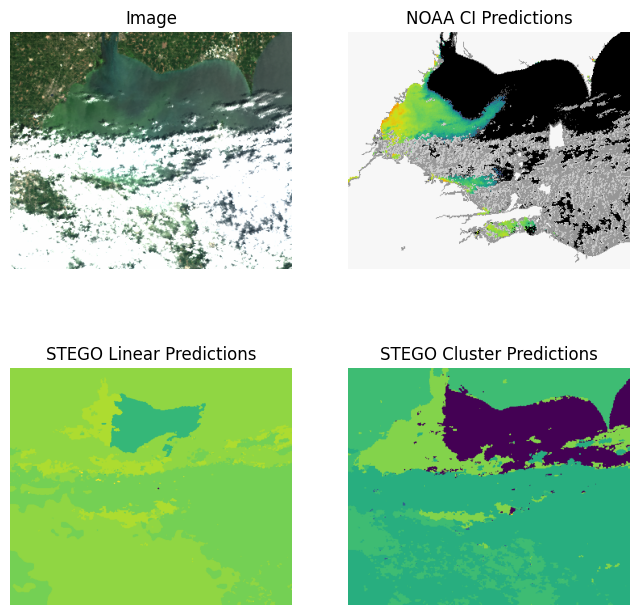

In [ ]:
get_res_vis(df_subset, 171)

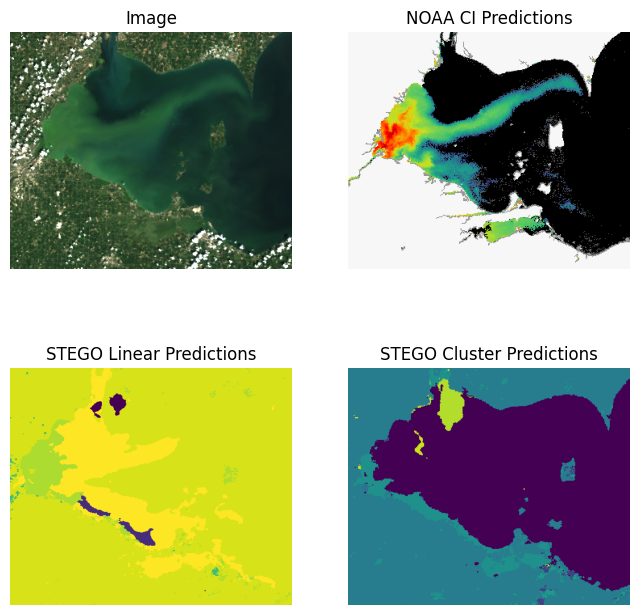

In [ ]:
get_res_vis(df_subset, 184)